# Ejercicio 3

Tal y como se determinó en el enunciado, la cantidad máxima de clientes en simultáneo es de 50. Por lo tanto, tenemos un total de 51 estados: del 1 al 51. En el instante t, la cantidad de gente conectada más uno será nuestro estado iésimo.

De ésta forma, armar la matriz de transición es algo trivial ya que la P de que el home banking pase del estado i al j está dada por la fórmula P(i->j)

    P = | P(1->1)  P(1->2)   P(1->3)   P(1->4)   ...   P(1->51)      |
        | P(2->1)  P(2->2)   P(2->3)   P(2->4)   ...   P(2->51)      |
        | P(3->1)  P(3->2)   P(3->3)   P(3->4)   ...   P(3->51)      |
        |  ....     ....      ....      ....     ...    ....         |
        | P(51->1)  P(51->2)   P(51->3)   P(51->4)   ...   P(51->51) |
        
Adonde P(i->j) es

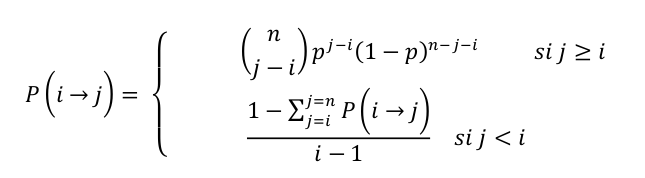

In [15]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt

class HomeBanking():
    
    def __init__(self, verbose=False):
        self.estado_actual = 1
        self.estados = [self.estado_actual]
        self.verbose = verbose
        
    def calcular_matriz(self):
        def porcentaje(i, j):
            p = 0.7
            n = 51
            if j >= i:
                comb = ( factorial(n) / factorial(n-(j-i)) ) / (factorial(j-i))
                res1 = comb * p**(j-i) * (1-p)**(n-(j-i))
                return res1

            # j < i
            suma = 0
            for x in range(i, n):
                suma += porcentaje(i, x)

            res2 = (1 - suma) / (i-1)
            return res2

        P = [[porcentaje(i, j) for j in range(1, 52)] for i in range(1, 52)]
        self.matriz = P
        return self.matriz
    
    def nuevo_usuario_conectado(self):
        if self.estado_actual == 51:
            return
        
        self.estado_actual += 1
        if self.verbose:
            print('Estado actual es {0}'.format(self.estado_actual))
    
    def simular_n_observaciones(self, n):
        self.estados = []
        for i in range(0, n):
            pass
        
    def calcular_nuevo_estado(self):
        if self.matriz is None:
            self.calcular_matriz()
            
        fila_actual = self.matriz[self.estado_actual-1]
        suma = 0
        r = np.random.rand()
        for i, item in enumerate(fila_actual):
            suma += item
            if r <= suma:
                self.estado_actual = i
                self.estados.append(self.estado_actual)
                if self.verbose:
                    print('Estado actual es {0}'.format(self.estado_actual))
                return self.estado_actual
                
    def get_estados(self):
        return self.estados

        
hb = HomeBanking(True)
P = hb.calcular_matriz()

## a) Matriz de transición de estados
Como primera medida, trataremos de determinar la matriz de transición, para lo que necesitaremos evaluar los autovalores de M. Según su valor vamos a poder ver si M^(n) converge

In [16]:
eigenvalues, eigenvectors = np.linalg.eig(P)
for e in eigenvalues:
    if abs(e) > 1:
        print('Este falla {0}'.format(e))

Este falla (1.0197614687851992+0j)


In [17]:
P_n = np.linalg.matrix_power(P, 100)
P_n

array([[0.15933146, 0.15933096, 0.15932909, ..., 0.14675865, 0.1399951 ,
        0.13299797],
       [0.1592467 , 0.1592462 , 0.15924433, ..., 0.14668058, 0.13992063,
        0.13292722],
       [0.15916679, 0.15916629, 0.15916442, ..., 0.14660698, 0.13985041,
        0.13286052],
       ...,
       [0.16154757, 0.16154705, 0.16154516, ..., 0.14879989, 0.14194226,
        0.13484781],
       [0.16148368, 0.16148317, 0.16148127, ..., 0.14874104, 0.14188613,
        0.13479448],
       [0.16142109, 0.16142058, 0.16141869, ..., 0.14868339, 0.14183113,
        0.13474224]])

## b) SIimulación de 100 observaciones. Cómo se modifica la cantidad de clientes conectados

In [18]:
PROBABILIDAD_USUARIO_NUEVO = 0.7

In [19]:
for i in range (100):
    r = np.random.rand()
    if r <= PROBABILIDAD_USUARIO_NUEVO:
        hb.nuevo_usuario_conectado()
        
    nuevo_estado = hb.calcular_nuevo_estado()

Estado actual es 2
Estado actual es 42
Estado actual es 21
Estado actual es 49
Estado actual es 41
Estado actual es 28
Estado actual es 29
Estado actual es 22
Estado actual es 9
Estado actual es 45
Estado actual es 46
Estado actual es 26
Estado actual es 5
Estado actual es 39
Estado actual es 40
Estado actual es 8
Estado actual es 44
Estado actual es 45
Estado actual es 25
Estado actual es 7
Estado actual es 8
Estado actual es 45
Estado actual es 7
Estado actual es 8
Estado actual es 39
Estado actual es 40
Estado actual es 18
Estado actual es 19
Estado actual es 13
Estado actual es 14
Estado actual es 43
Estado actual es 44
Estado actual es 20
Estado actual es 21
Estado actual es 19
Estado actual es 20
Estado actual es 16
Estado actual es 17
Estado actual es 12
Estado actual es 44
Estado actual es 31
Estado actual es 32
Estado actual es 22
Estado actual es 23
Estado actual es 2
Estado actual es 38
Estado actual es 39
Estado actual es 34
Estado actual es 13
Estado actual es 14
Estado ac

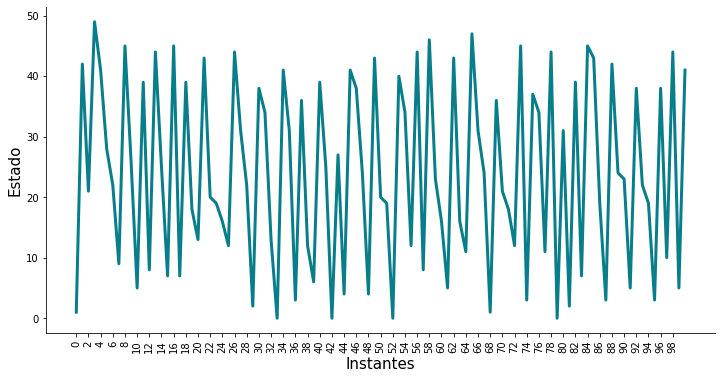

In [24]:
estados = hb.get_estados()
# assert len(estados) == 101
instantes = [i for i in range(len(estados))]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(instantes, estados, color='#087E8B', linewidth=3.0)
plt.xlabel('Instantes', size=15)
plt.ylabel('Estado', size=15)
plt.xticks(np.arange(0, max(instantes), 2), rotation=90)
plt.show()

## c) Simulación de 100.000 observaciones. Histograma

In [27]:
hb = HomeBanking()
P = hb.calcular_matriz()

for i in range (100000):
#     print('Iteracion {0}'.format(i))
    r = np.random.rand()
    if r <= 0.7:
        hb.nuevo_usuario_conectado()
        
    nuevo_estado = hb.calcular_nuevo_estado()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[2368, 2368, 2339, 2357, 2418, 2378, 2389, 2337, 2370, 2331, 2268, 2285, 2189, 2087, 2128, 1937, 1941, 1785, 1756, 1674, 1575, 1492, 1430, 1327, 1311, 1275, 1230, 1217, 1167, 1161, 1244, 1297, 1363, 1479, 1672, 1987, 2178, 2350, 2532, 2671, 2723, 2707, 2650, 2602, 2453, 2446, 2336, 2227, 2164, 2030]


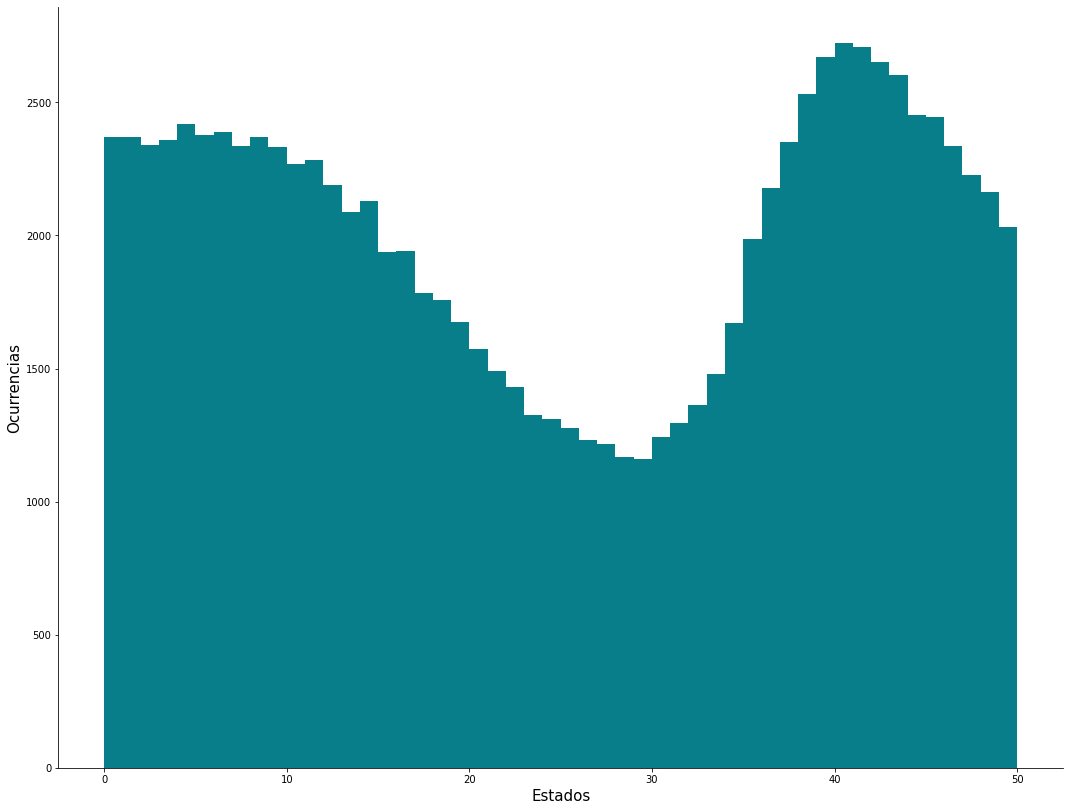

In [51]:
estados = hb.get_estados()
# assert len(estados) == 100001
# print(len(estados))
estados_distintos = list(set(estados))
cantidades = [estados.count(x) for x in estados_distintos]
print(estados_distintos)
print(cantidades)

fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.hist(estados, bins=np.arange(0, 51, 1), color='#087E8B', linewidth=3.0)
plt.xlabel('Estados', size=15)
plt.ylabel('Ocurrencias', size=15)
plt.show()

## d) Porcentaje de tiempo que el HomeBanking no tuvo clientes conectados

Esto quiere decir, evaluar el porcentaje de instantes en los que el HomeBanking estuvo en el estado 1: sin clientes conectados

Para ello, vamos a calcular el vector de distribución estacionaria: dado P^(n), si n->infinito, entonces:

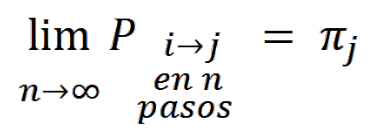

Esto implica que al evaluar el vector de distribución estacionaria averiguamos el porcentaje de tiempo que el sistema pasa en un determinado estado (luego de una cantidad n relativamente grande de pasos), independientemente de su estado inicial

In [204]:
P = np.array([np.array(pi) for pi in P])
np.fill_diagonal(P, -1)
P

array([[-1.00000000e+00,  2.56289582e-25,  1.49502256e-23, ...,
         2.06373864e-05,  2.94819805e-06,  2.75165152e-07],
       [ 3.23595246e-06, -1.00000000e+00,  2.56289582e-25, ...,
         1.06135130e-04,  2.06373864e-05,  2.94819805e-06],
       [ 1.19366694e-05,  1.19366694e-05, -1.00000000e+00, ...,
         4.27572952e-04,  1.06135130e-04,  2.06373864e-05],
       ...,
       [ 2.08333333e-02,  2.08333333e-02,  2.08333333e-02, ...,
        -1.00000000e+00,  2.56289582e-25,  1.49502256e-23],
       [ 2.04081633e-02,  2.04081633e-02,  2.04081633e-02, ...,
         2.04081633e-02, -1.00000000e+00,  2.56289582e-25],
       [ 2.00000000e-02,  2.00000000e-02,  2.00000000e-02, ...,
         2.00000000e-02,  2.00000000e-02, -1.00000000e+00]])

In [205]:
b = np.full(shape=51, fill_value=1, dtype=np.int)
print(b)
res = np.append(np.full(shape=51, fill_value=0, dtype=np.int), [1])
print(res)

P_extended = np.vstack([P, b])# b.append(1)
print(P_extended.shape)
print(res.shape)
r = np.linalg.lstsq(P_extended, res, rcond=None)[0]
print(sum(r))
r

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
(52, 51)
(52,)
0.9999927925098411


array([0.01895401, 0.01891875, 0.0188864 , 0.01885927, 0.01884144,
       0.01884126, 0.01887428, 0.0189644 , 0.01913935, 0.01941917,
       0.01980099, 0.02024845, 0.02069435, 0.02105837, 0.0212732 ,
       0.02130714, 0.02117302, 0.02092032, 0.02061517, 0.02031833,
       0.0200702 , 0.0198869 , 0.01976541, 0.01969244, 0.01965238,
       0.01963196, 0.01962181, 0.01961596, 0.01961067, 0.01960331,
       0.0195916 , 0.01957344, 0.01954708, 0.01951174, 0.01946809,
       0.01941863, 0.01936732, 0.0193188 , 0.01927717, 0.01924497,
       0.0192228 , 0.01920958, 0.01920334, 0.01920201, 0.01920399,
       0.0192083 , 0.01921446, 0.01922228, 0.01923165, 0.01924243,
       0.01925439])

Ahora para ver el porcentaje de tiempo que el sistema pasa en el estado 1 = sin personas conectadas, entonces vemos el primer elemento de r

In [206]:
r[0] * 100 

1.895400961115718

## e) Evaluar si es conveniente realizar la migración

Para averiguar cuál es el porcentaje de tiempo que el sistema cuenta con más de 40 clientes conectados debemos sumar las últimas 10 posiciones del vector r

In [207]:
mas_de_40 = r[-10:]
mas_de_40

array([0.01920958, 0.01920334, 0.01920201, 0.01920399, 0.0192083 ,
       0.01921446, 0.01922228, 0.01923165, 0.01924243, 0.01925439])

In [208]:
mas_de_40.sum() * 100

19.219242806774478

Como vemos, la cantidad de tiempo que el HomeBanking posee más de 40 clientes conectados es casi un 20%, muy por encima del 10% considerado como umbral. En conclusión, no se recomienda realizar la migración